In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
data = pd.read_excel(r"C:\Users\kriti\kriti python\Hourly Patient Data.xlsx")

In [3]:
data['Time'] = pd.to_datetime(data['Time'])

In [4]:
data.set_index('Time', inplace=True)

In [5]:
data.drop(columns=['ESI 1', 'ESI 3', 'ESI 4', 'ESI 5'], inplace=True)

In [6]:
esi1_daily = data['ESI 2'].resample('D').sum()

In [7]:
esi1_daily_df = esi1_daily.reset_index()

In [8]:
esi1_daily_df.columns = ['Date', 'ESI 2']

In [9]:
print(esi1_daily_df)

           Date  ESI 2
0    2017-01-01     38
1    2017-01-02     31
2    2017-01-03     42
3    2017-01-04     38
4    2017-01-05     42
...         ...    ...
1456 2020-12-27     63
1457 2020-12-28     82
1458 2020-12-29     66
1459 2020-12-30     56
1460 2020-12-31     48

[1461 rows x 2 columns]


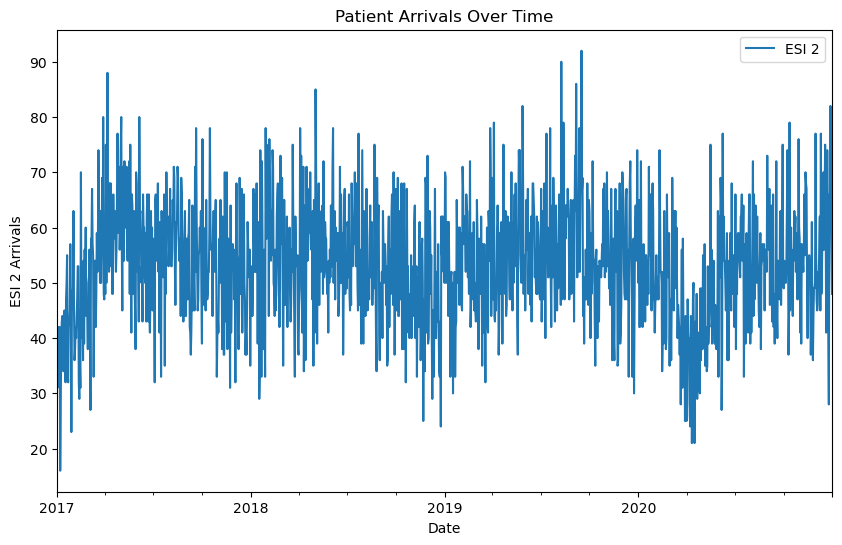

In [10]:
esi1_daily_df.plot(x='Date', y='ESI 2', figsize=(10, 6))
plt.title('Patient Arrivals Over Time')
plt.xlabel('Date')
plt.ylabel('ESI 2 Arrivals')
plt.show()

In [11]:
train_size = int(len(esi1_daily_df) * 0.9)  
train, test = esi1_daily_df.iloc[:train_size], esi1_daily_df.iloc[train_size:]

In [12]:
model = ExponentialSmoothing(train['ESI 2'], seasonal='add', seasonal_periods=7)
fitted_model = model.fit()

In [13]:
forecast_values = fitted_model.forecast(len(test))

In [14]:
forecast_values

1314    56.502241
1315    48.313805
1316    48.314434
1317    60.009961
1318    56.141668
          ...    
1456    48.314434
1457    60.009961
1458    56.141668
1459    55.448913
1460    54.649766
Length: 147, dtype: float64

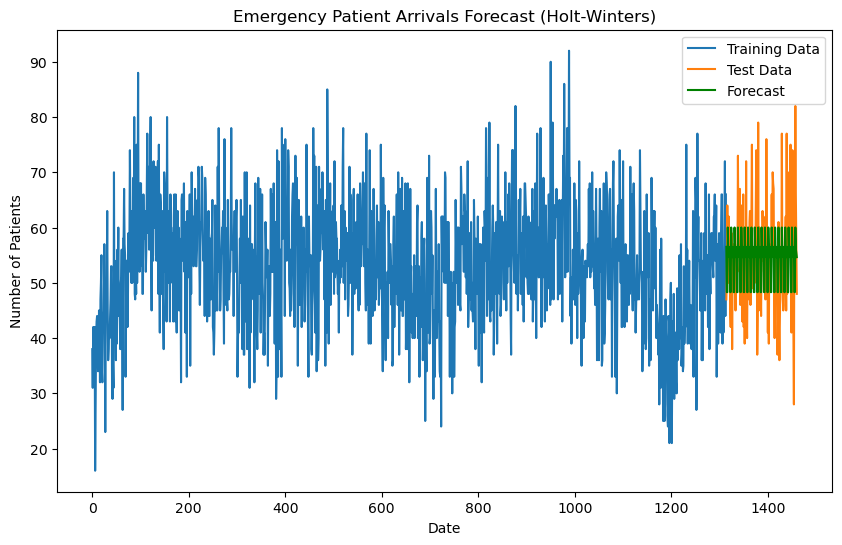

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['ESI 2'], label='Training Data')
plt.plot(test.index, test['ESI 2'], label='Test Data')
plt.plot(test.index, forecast_values, label='Forecast', color='green')
plt.title('Emergency Patient Arrivals Forecast (Holt-Winters)')
plt.xlabel('Date')
plt.ylabel('Number of Patients')
plt.legend()
plt.show()

In [16]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test['ESI 2'], forecast_values)
print("MAPE:", mape)

MAPE: 14.494010258988919


In [17]:
rmse = np.sqrt(mean_squared_error(test['ESI 2'], forecast_values))
print("RMSE:", rmse)

RMSE: 9.571535916480935


In [18]:
import numpy as np

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Example usage:
# Assuming test['ESI 2'] contains the true values and forecast_values contains the predicted values
mae = mean_absolute_error(test['ESI 2'], forecast_values)
print("MAE:", mae)


MAE: 7.658632635176041


In [19]:
for i, value in enumerate(test['ESI 2']):
    print(f"Index {i}: {value}")

Index 0: 47
Index 1: 51
Index 2: 64
Index 3: 55
Index 4: 50
Index 5: 62
Index 6: 52
Index 7: 53
Index 8: 45
Index 9: 42
Index 10: 54
Index 11: 59
Index 12: 38
Index 13: 53
Index 14: 54
Index 15: 57
Index 16: 54
Index 17: 55
Index 18: 57
Index 19: 45
Index 20: 56
Index 21: 56
Index 22: 54
Index 23: 52
Index 24: 73
Index 25: 57
Index 26: 61
Index 27: 56
Index 28: 67
Index 29: 46
Index 30: 63
Index 31: 54
Index 32: 64
Index 33: 43
Index 34: 55
Index 35: 66
Index 36: 42
Index 37: 48
Index 38: 39
Index 39: 48
Index 40: 44
Index 41: 72
Index 42: 45
Index 43: 40
Index 44: 54
Index 45: 51
Index 46: 49
Index 47: 47
Index 48: 61
Index 49: 63
Index 50: 46
Index 51: 57
Index 52: 62
Index 53: 75
Index 54: 51
Index 55: 49
Index 56: 54
Index 57: 52
Index 58: 50
Index 59: 50
Index 60: 53
Index 61: 64
Index 62: 74
Index 63: 63
Index 64: 37
Index 65: 44
Index 66: 79
Index 67: 45
Index 68: 59
Index 69: 60
Index 70: 48
Index 71: 50
Index 72: 44
Index 73: 56
Index 74: 54
Index 75: 63
Index 76: 59
Index 77:

In [20]:
import numpy as np

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))


mae = mean_absolute_error(test['ESI 2'], forecast_values)
print("MAE:", mae)

MAE: 7.658632635176041
